In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # no more warnings



In [ ]:
import pandas as pd

# Load CSV file into DataFrame 
data = pd.read_csv('/Users/noachmeged/Documents/Ironhack/Labs/lab-customer-analysis-round-4/files_for_lab/csv_files/marketing_customer_analysis.csv')


In [14]:
#  Check the data types of the columns. 
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [23]:
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
numerical_data = data.select_dtypes("number")

categorical_data = data.select_dtypes("object")

 # Now we will try to check the normality of the numerical variables visuall

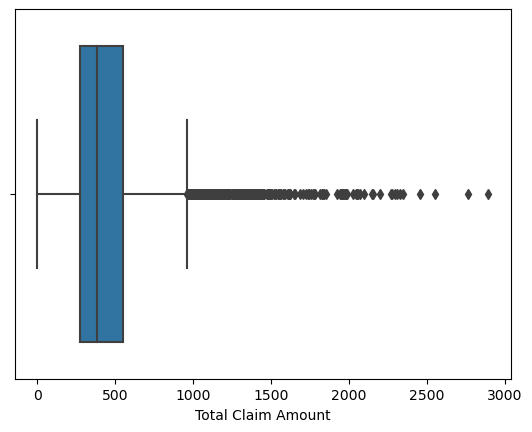

In [115]:
# Use seaborn library to construct distribution plots for the numerical variables
sns.boxplot(x= "Total Claim Amount", data=numerical_data)
plt.show()



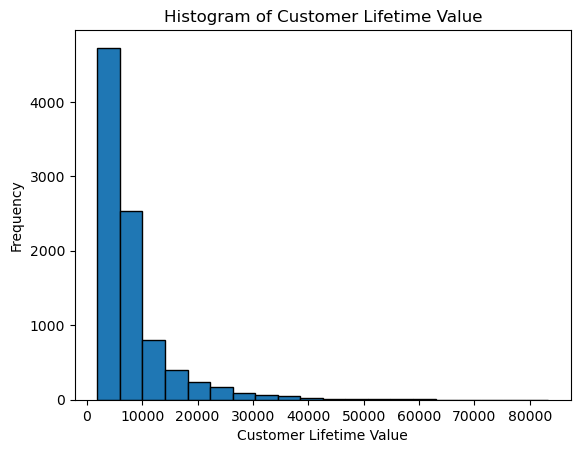

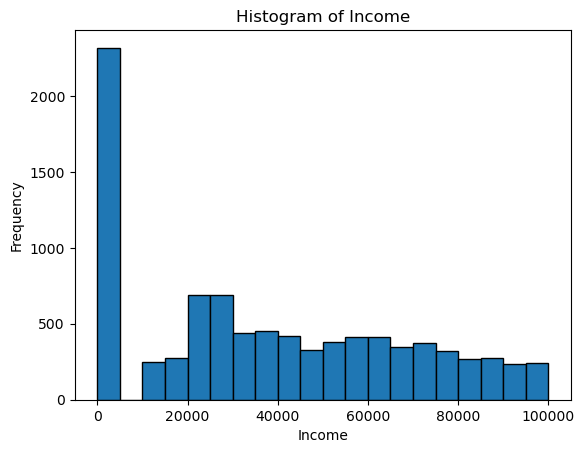

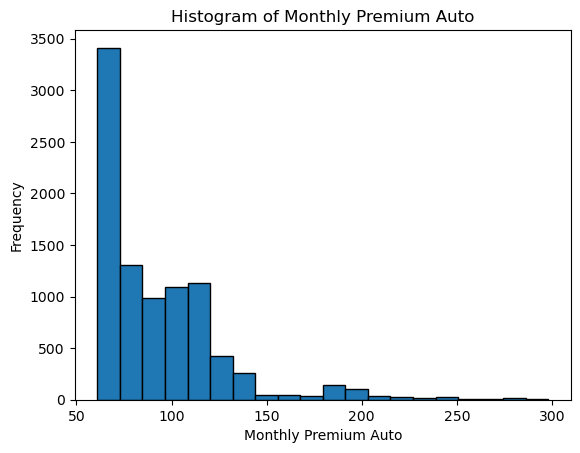

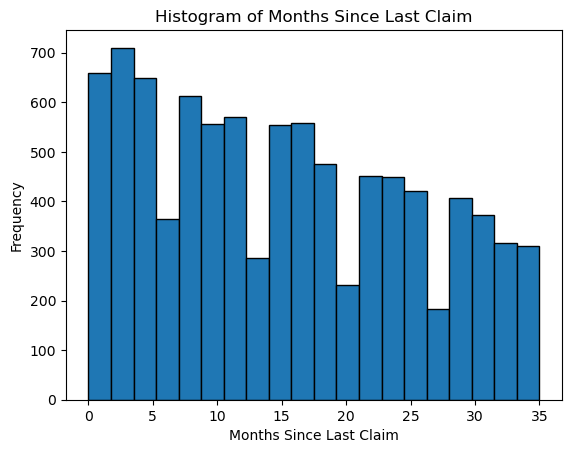

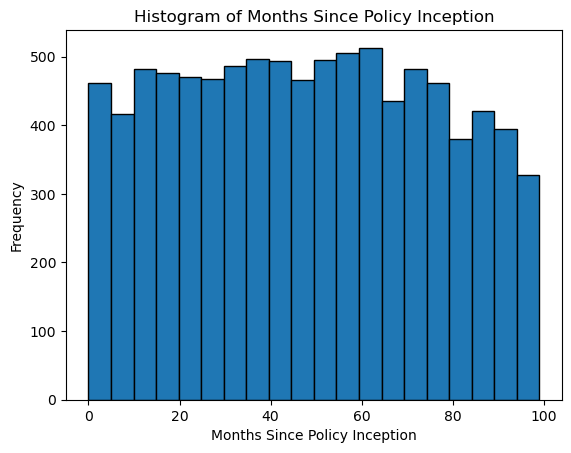

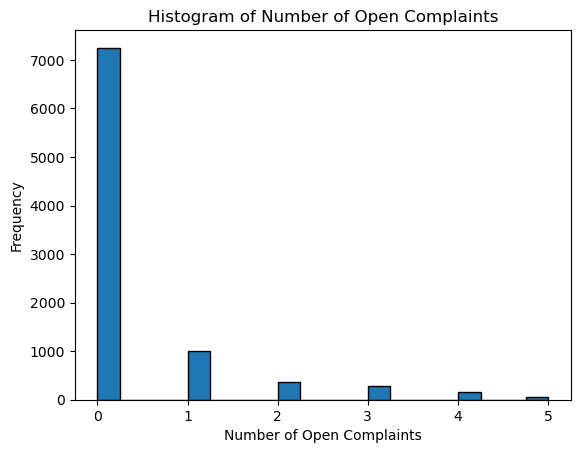

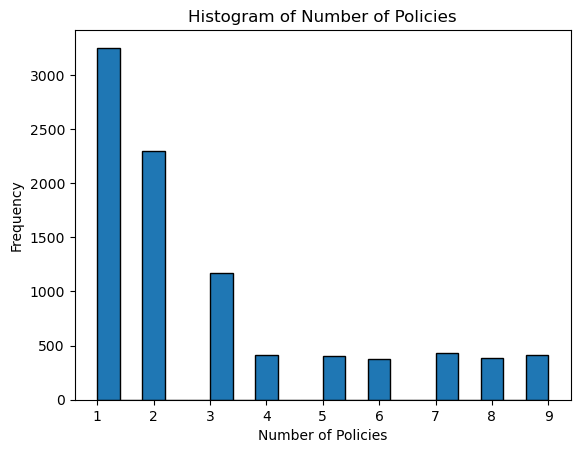

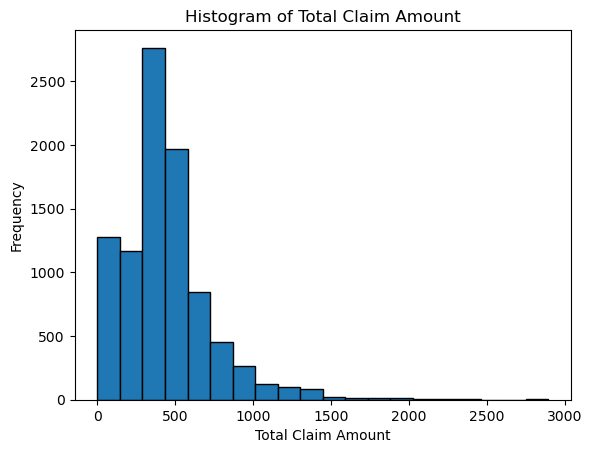

In [46]:
# Use Matplotlib to construct histograms
for column in numerical_data.columns:
    plt.hist(numerical_data[column], bins=20, edgecolor='black')  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [96]:
# Change into into floats
numerical_data.describe().astype(int)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134,9134,9134,9134,9134,9134,9134,9134
mean,8004,37657,93,15,48,0,2,434
std,6870,30379,34,10,27,0,2,290
min,1898,0,61,0,0,0,1,0
25%,3994,0,68,6,24,0,1,272
50%,5780,33889,83,14,48,0,2,383
75%,8962,62320,109,23,71,0,4,547
max,83325,99981,298,35,99,5,9,2893


Customer Lifetime Value


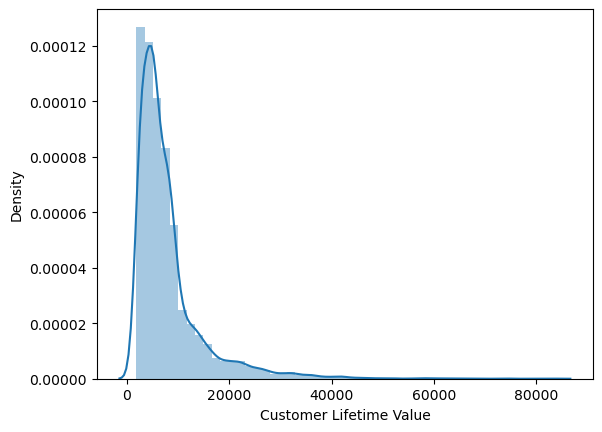

Income


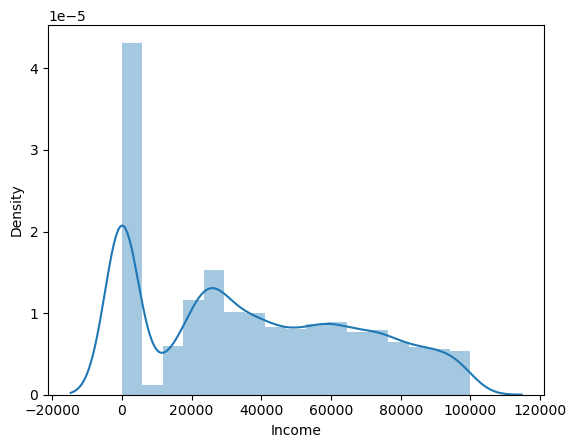

Monthly Premium Auto


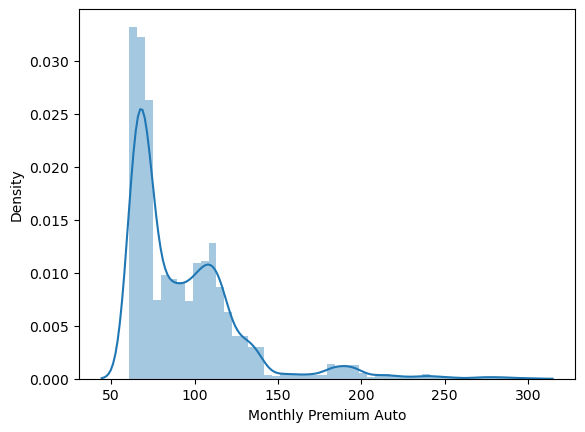

Months Since Last Claim


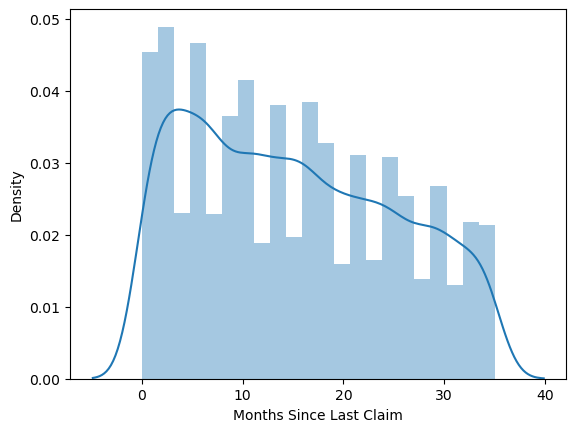

Months Since Policy Inception


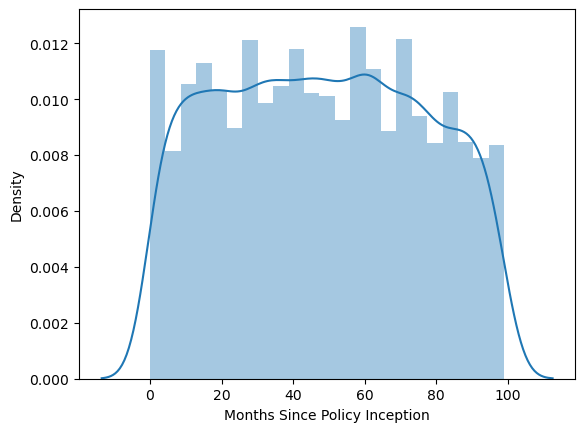

Number of Open Complaints


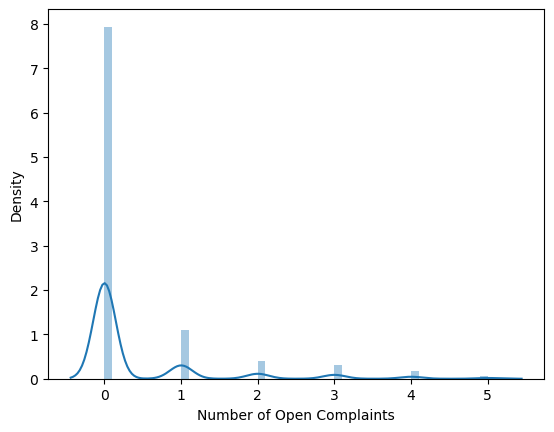

Number of Policies


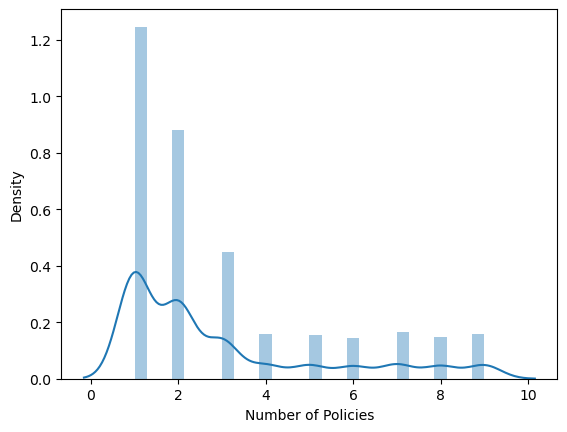

Total Claim Amount


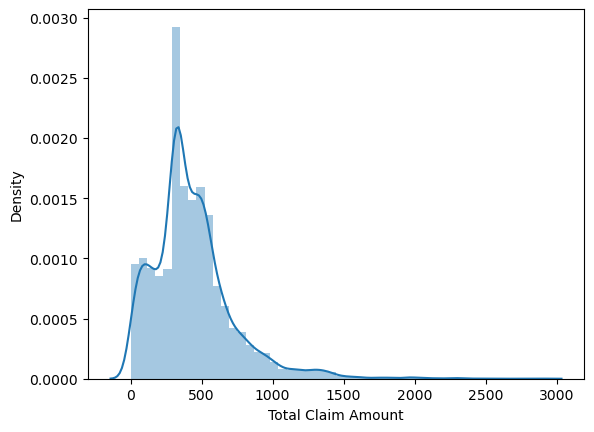

In [106]:
# Do the distributions for different numerical variables look like a normal distribution
for col in numerical_data.columns:
  print(col)
  sns.distplot(numerical_data[col])
  plt.show()

In [97]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
correlations_matrix = numerical_data.corr() # method="spearman"
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [89]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap.
correlations_matrix[(correlations_matrix > .9) | (correlations_matrix < -.9)]

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Premium Auto,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Months Since Last Claim,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Months Since Policy Inception,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Number of Open Complaints,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Number of Policies,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Total Claim Amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for the correlation matrix 
correlations_matrix[(correlations_matrix['Total Claim Amount'] > .9) | (correlations_matrix['Total Claim Amount'] < -.9)]['Total Claim Amount']

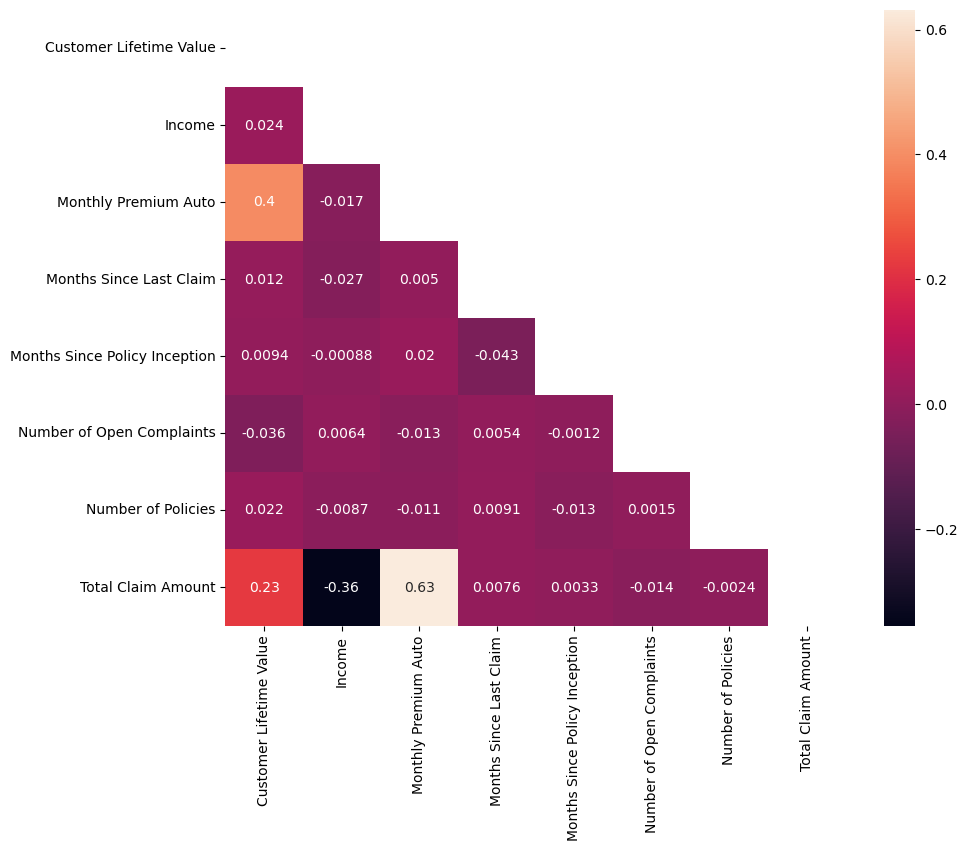

In [101]:
# Write code for the seaborn
# 4. We can also check for multicolinearity between variables:
# rule of thumb: if two features have a correlation > .9, you might want to drop the one with smaller correlation with the target

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True  # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()
# in this example, we could drop columns: median_household_income, ic3, hvp1, etc

In [102]:
# correlation with the target matrix "Total Claim Amount"
correlations_matrix['Total Claim Amount'].sort_values(ascending=False) 

Total Claim Amount               1.000000
Monthly Premium Auto             0.632017
Customer Lifetime Value          0.226451
Months Since Last Claim          0.007563
Months Since Policy Inception    0.003335
Number of Policies              -0.002354
Number of Open Complaints       -0.014241
Income                          -0.355254
Name: Total Claim Amount, dtype: float64